In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


170498071/170498071 [==============================] - 2s 0us/step


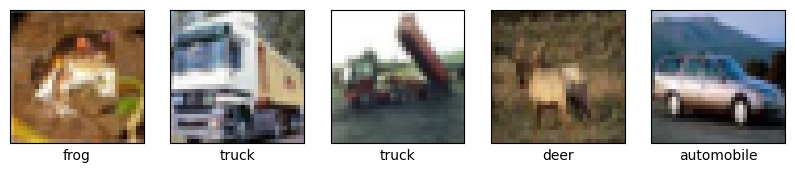

In [3]:
# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the images to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Displaying the first 5 images and their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Displaying the model structure
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5359 - accuracy: 0.4389 - val_loss: 1.2740 - val_accuracy: 0.5344
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1409 - accuracy: 0.5976 - val_loss: 1.0548 - val_accuracy: 0.6239
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9851 - accuracy: 0.6544 - val_loss: 1.0738 - val_accuracy: 0.6276
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8909 - accuracy: 0.6865 - val_loss: 0.9674 - val_accuracy: 0.6641
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8197 - accuracy: 0.7126 - val_loss: 0.9039 - val_accuracy: 0.6862
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7586 - accuracy: 0.7358 - val_loss: 0.8649 - val_accuracy: 0.6979
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7075 - accuracy: 0.7534 - val_loss: 0.9143 - val_accuracy

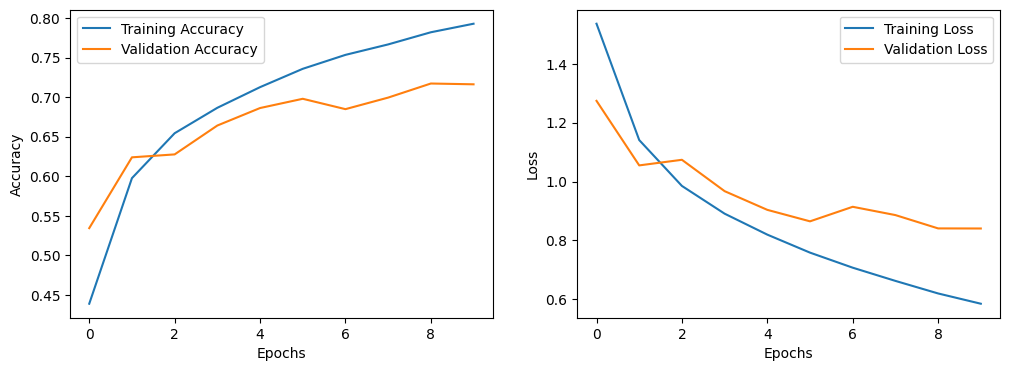

In [5]:
# Training the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [6]:
# Evaluating the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')


313/313 - 1s - loss: 0.8406 - accuracy: 0.7162 - 638ms/epoch - 2ms/step
Test Accuracy: 0.7161999940872192
